In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop(columns = {'Unnamed: 0'}, inplace = True)

In [5]:
df.shape

(30, 2)

In [6]:
x_train = df.YearsExperience
x_train

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64

In [7]:
y_train = df.Salary
y_train

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

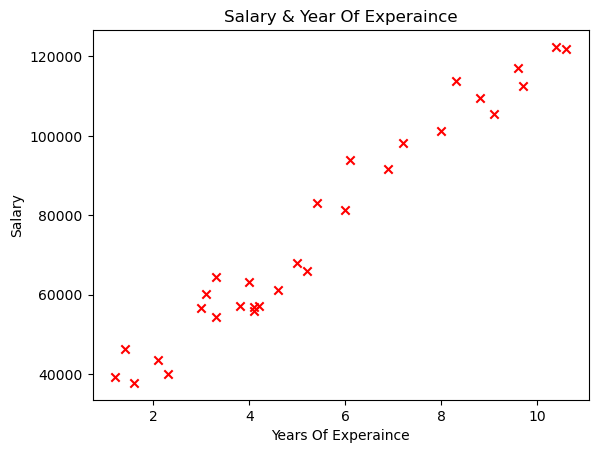

In [24]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Salary & Year Of Experaince")
# Set the y-axis label
plt.xlabel('Years Of Experaince')
# Set the x-axis label
plt.ylabel('Salary')
plt.show()

### Model function

- f_wb = w * x[0] + b
- f_wb = w * x[1] + b

In [9]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    ## model prediction
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b        
    return f_wb

In [10]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [11]:
def compute_gradient(x, y, w, b): 
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [12]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
       # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [13]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.30e+09  dj_dw: -4.850e+05, dj_db: -7.600e+04   w:  4.850e+03, b: 7.60040e+02
Iteration 1000: Cost 1.65e+07  dj_dw:  8.854e+01, dj_db: -6.033e+02   w:  9.880e+03, b: 2.19186e+04
Iteration 2000: Cost 1.57e+07  dj_dw:  1.132e+01, dj_db: -7.711e+01   w:  9.505e+03, b: 2.44737e+04
Iteration 3000: Cost 1.56e+07  dj_dw:  1.447e+00, dj_db: -9.856e+00   w:  9.457e+03, b: 2.48003e+04
Iteration 4000: Cost 1.56e+07  dj_dw:  1.849e-01, dj_db: -1.260e+00   w:  9.451e+03, b: 2.48421e+04
Iteration 5000: Cost 1.56e+07  dj_dw:  2.363e-02, dj_db: -1.610e-01   w:  9.450e+03, b: 2.48474e+04
Iteration 6000: Cost 1.56e+07  dj_dw:  3.021e-03, dj_db: -2.058e-02   w:  9.450e+03, b: 2.48481e+04
Iteration 7000: Cost 1.56e+07  dj_dw:  3.862e-04, dj_db: -2.631e-03   w:  9.450e+03, b: 2.48482e+04
Iteration 8000: Cost 1.56e+07  dj_dw:  4.936e-05, dj_db: -3.363e-04   w:  9.450e+03, b: 2.48482e+04
Iteration 9000: Cost 1.56e+07  dj_dw:  6.309e-06, dj_db: -4.299e-05   w:  9.450e+03, b: 2.48482e+04


## Computer the mode output again after calculate W , B

In [14]:
tmp_f_wbFinal = compute_model_output(x_train, w_final, b_final)
tmp_f_wbFinal


array([ 36188.15873024,  38078.15119532,  39968.14366039,  44693.12482308,
        46583.11728816,  53198.09091592,  54143.08714846,  56033.07961354,
        56033.07961354,  60758.06077623,  62648.0532413 ,  63593.04947384,
        63593.04947384,  64538.04570638,  68318.03063653,  72098.01556668,
        73988.00803176,  75878.00049683,  81547.97789206,  82492.9741246 ,
        90052.9439849 ,  92887.93268252, 100447.90254282, 103282.89124043,
       108007.87240312, 110842.86110074, 115567.84226343, 116512.83849596,
       123127.81212373, 125017.80458881])

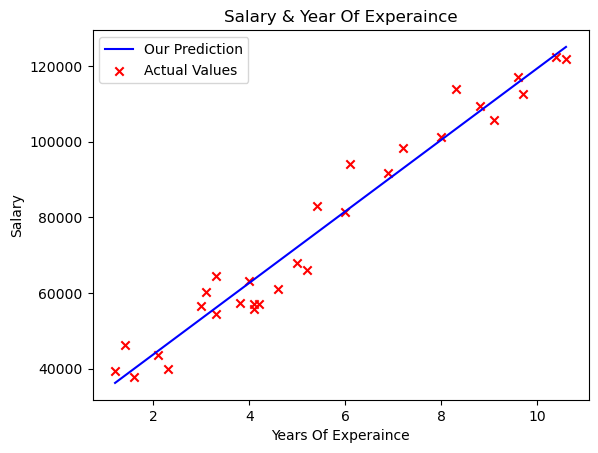

In [25]:
# Plot our model prediction
plt.plot(x_train, tmp_f_wbFinal, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Salary & Year Of Experaince")
# Set the y-axis label
plt.xlabel('Years Of Experaince')
# Set the x-axis label
plt.ylabel('Salary')
plt.legend()
plt.show()

## Cost between Train data and pridict data

In [16]:
compute_cost(y_train, tmp_f_wbFinal, w_final, b_final)

2.9032624346445946e+17

In [23]:
# R2 score
print(f'Accuracy of Model is {round(r2_score(y_train, tmp_f_wbFinal) * 100, 2)}%')

Accuracy of Model is 95.7%


## Predict Some Salaries

In [17]:
print(f'Experaince = 4 salary prediction {w_final * 4 + b_final:0.1f}$')

Experaince = 4 salary prediction 62648.1$
